Training data shape (7000, 11)
Test data shape (3000, 11)
Theta optimized: [[-3.01901305]
 [-0.41253921]
 [-1.49441781]
 [-1.42034104]
 [-0.46699011]
 [-0.48809893]
 [-0.77016683]
 [-0.76346099]
 [-1.5559384 ]
 [-1.57318158]
 [-1.08966053]]
Cost with optimized theta: 0.013896660498245646
Cost with optimized theta: 0.0008787593585276823
Goodness of fit 

Test set:  -1.0

Test accuracy:  0.5


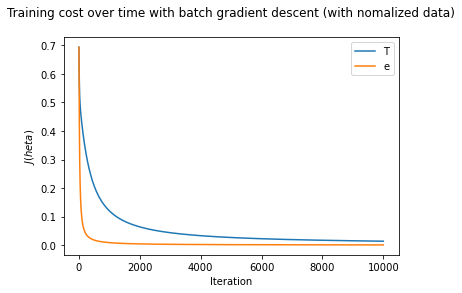

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Import the data
data = pd.read_csv('Pandas_ML_Project_SNR_Minus5.csv')
X = data.iloc[:,1:11].to_numpy()
# print(X)
y = data.iloc[:,-1].to_numpy()
# print(y)
m,n = X.shape
y = y.reshape(m,1)

XX = np.insert(X, 0, 1, axis=1)
# print(XX)
y = y.reshape(m, 1)
idx = np.arange(0, m)
percent_train = .7
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

print('Training data shape', X_train.shape)
print('Test data shape', X_test.shape)


def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

n = X.shape[1]
X = np.insert(X, 0, 1, axis=1)

theta_initial = np.zeros((n+1, 1))

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

alpha = .05
num_iters = 10000
# theta, j_history = train(X, y, theta_initial, alpha, num_iters)
theta, j_history_train = train(X_train, y_train, theta_initial, alpha, num_iters)
theta, j_history_test = train(X_test, y_test, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
# print("Cost with optimized theta:", j_history[-1])
print("Cost with optimized theta:", j_history_train[-1])
print("Cost with optimized theta:", j_history_test[-1])

plt.plot(j_history_train)
plt.legend('Train')
plt.plot(j_history_test)
plt.legend('Test')
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (with nomalized data)\n")

def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = h(X, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y, y_test_pred_soft)
test_rsq_hard = r_squared(y, y_test_pred_hard)
test_acc = (y_test_pred_hard == y).astype(int).sum() / y.shape[0]

print('Goodness of fit \n')
print('Test set: ',test_rsq_hard)
print('\nTest accuracy: ',test_acc)